In [20]:
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab


In [2]:
gdf = gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\allhousesclustered1.shp")
gdf

,name_x,fclass,osm_id,long,latt,cluster,C_PTS,D_C_PTS,C_Super,D_C_Super,C_DoctorsI,D_C_Doctor,C_SchoolsI,D_C_School,C_SportID,D_C_Sport,geometry
0,The Hague Tower,building,37774391,4.324224,52.071575,3603,1301378,107.161512,170,397.025030,12,644.307493,78,1093.290909,92,351.857639,POINT (4.32422 52.07158)
1,None,building,267117842,4.324910,52.071850,3603,1301378,107.161512,170,397.025030,12,644.307493,78,1093.290909,92,351.857639,POINT (4.32491 52.07185)
2,None,building,58350937,4.319504,52.019770,1403,16402,1401.525367,59,2545.583465,3,2830.766890,101,3064.414074,13,2781.176538,POINT (4.31950 52.01977)
3,None,building,253797461,4.320369,52.019398,1403,16402,1401.525367,59,2545.583465,3,2830.766890,101,3064.414074,13,2781.176538,POINT (4.32037 52.01940)
4,None,building,427468640,4.321300,52.018973,1403,16402,1401.525367,59,2545.583465,3,2830.766890,101,3064.414074,13,2781.176538,POINT (4.32130 52.01897)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93480,None,building,766622131,4.382658,52.054053,3714,651931,435.366264,67,1704.349670,29,1777.164385,9,1302.511442,6,1596.647441,POINT (4.38266 52.05405)
93481,None,building,697411648,4.381724,52.054196,600,651931,628.828303,67,1897.811709,29,1970.626425,9,1495.973482,6,1790.109481,POINT (4.38172 52.05420)
93482,None,building,766622106,4.382214,52.054351,600,651931,628.828303,67,1897.811709,29,1970.626425,9,1495.973482,6,1790.109481,POINT (4.38221 52.05435)
93483,None,building,745899409,4.218895,52.041474,4934,1547770,1639.160926,163,2204.908802,65,4893.801925,90,4589.109529,47,2636.794572,POINT (4.21889 52.04147)


In [4]:
sum_squared_distances = []
X =  gdf[['D_C_PTS', 'D_C_Super', 'D_C_Doctor', 'D_C_Sport', 'D_C_School']]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(X)
    sum_squared_distances.append(kmeans.inertia_)

sum_squared_distances

[254911013608.71408,
 162414559350.43085,
 113921573981.06815,
 88621059911.20073,
 69462614590.65262,
 57634206346.71695,
 51460558107.59728,
 47131561168.46438,
 43197266448.1807,
 40124901211.648735,
 37131767064.36974,
 34615850686.99275,
 32454854142.28035,
 30321160760.887283]

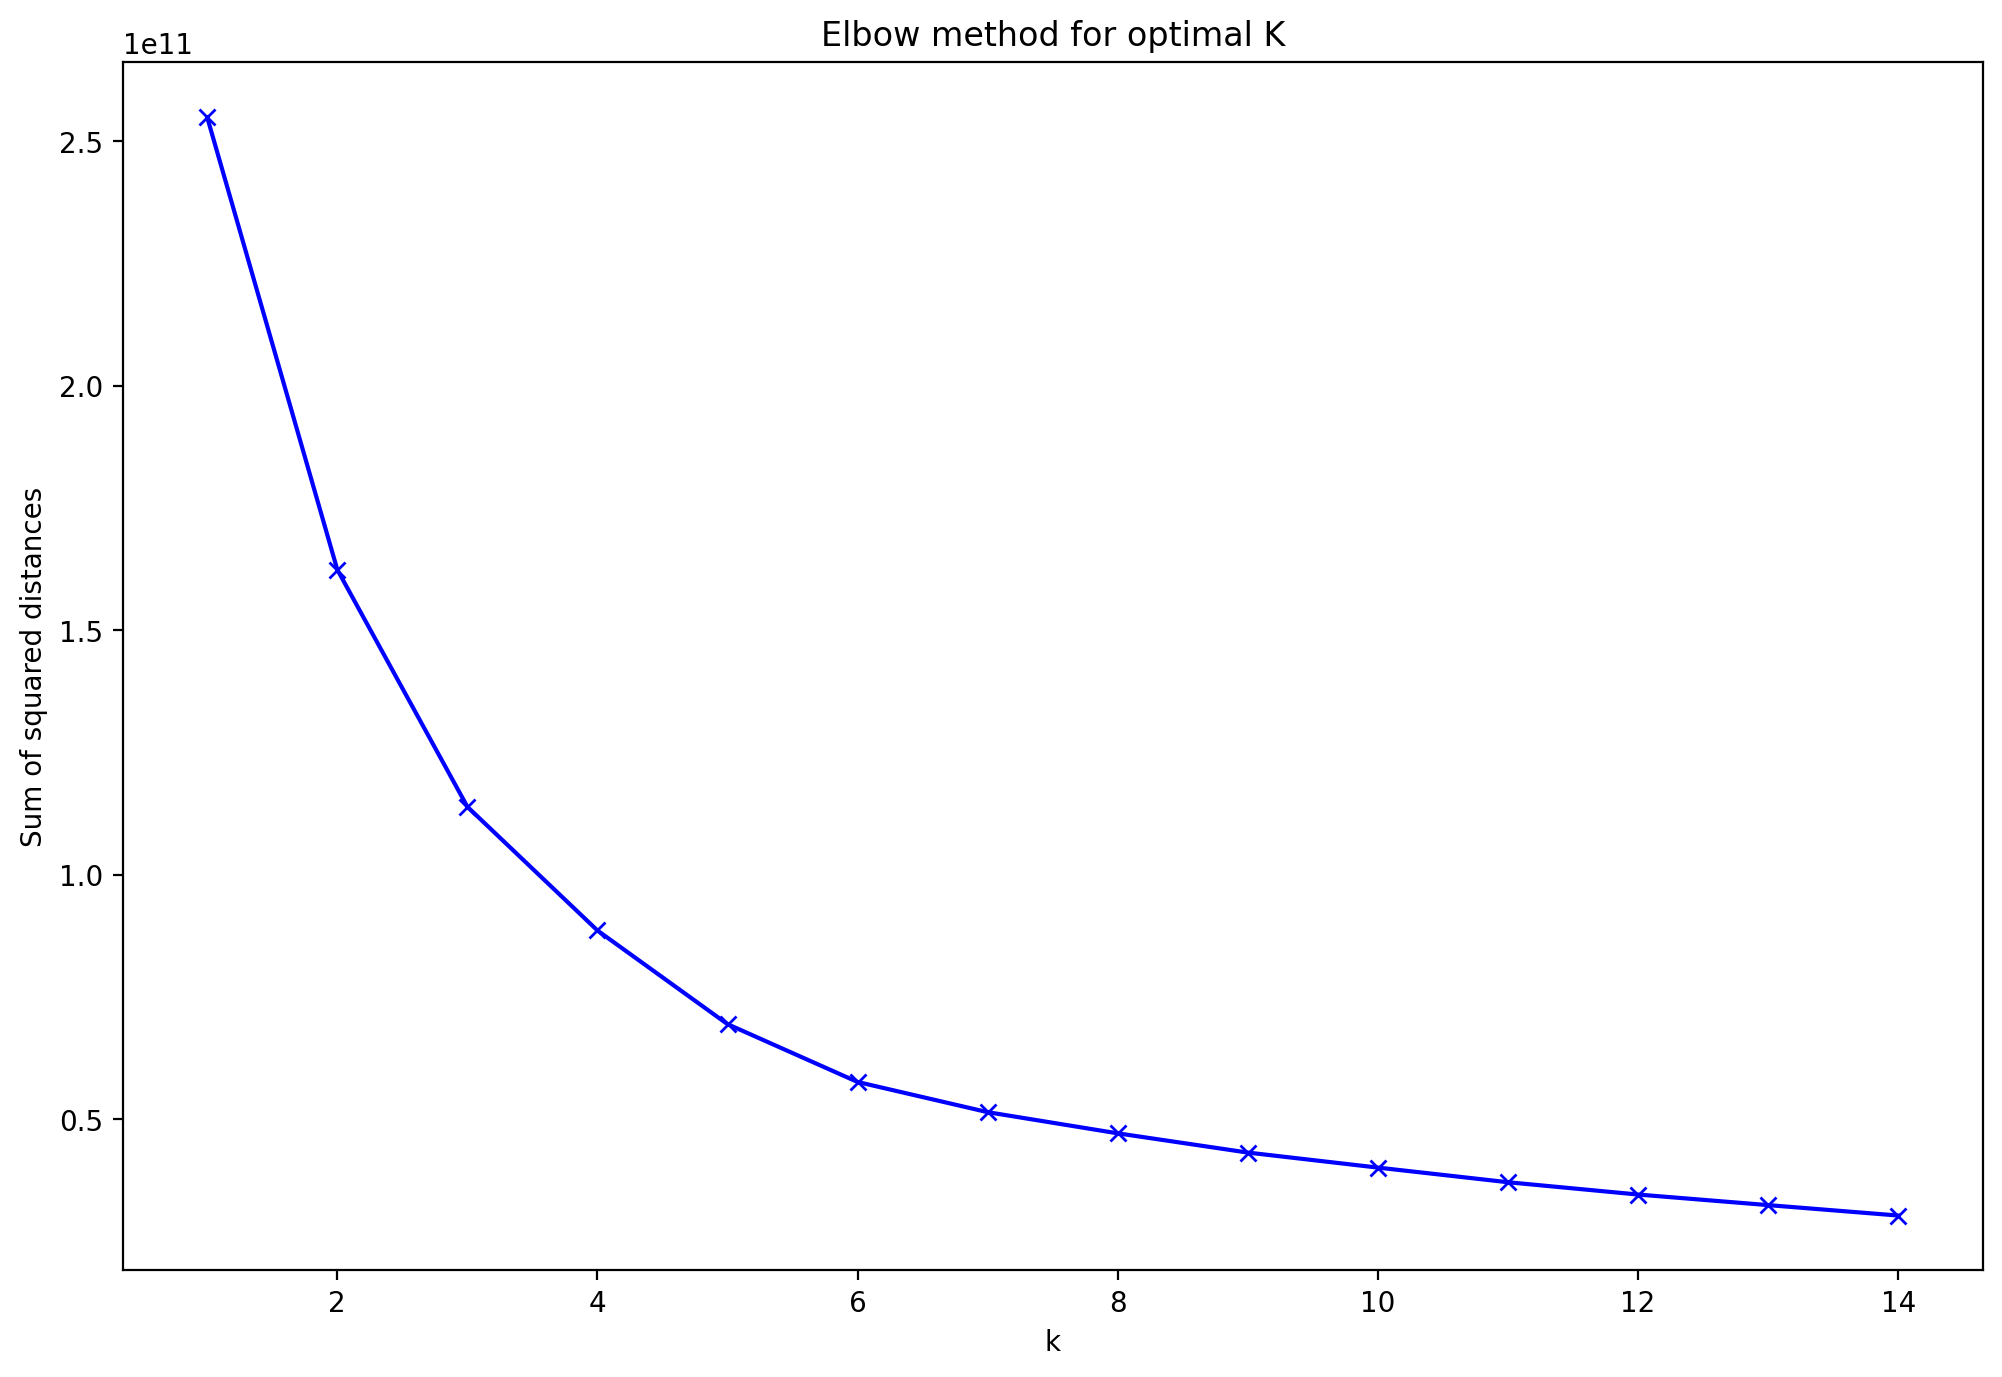

In [5]:
x = range(1,15)
y = sum_squared_distances
fig, ax = plt.subplots(figsize=(12,8), dpi = 200)
ax.plot(x, y, 'bx-')
ax.set(xlabel = 'k', ylabel = 'Sum of squared distances', title = 'Elbow method for optimal K')
fig.savefig(r"C:\Users\bruno\Documents\J3Q3-4 BEP\Onderzoeksrapport\kaarten\Elbowplot3.png")

In [3]:
X =  gdf[['D_C_PTS', 'D_C_Super', 'D_C_Doctor', 'D_C_Sport', 'D_C_School']]
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(X)
gdf['accs'] =  kmeans.labels_
gdf

,name_x,fclass,osm_id,long,latt,cluster,C_PTS,D_C_PTS,C_Super,D_C_Super,C_DoctorsI,D_C_Doctor,C_SchoolsI,D_C_School,C_SportID,D_C_Sport,geometry,accs
0,The Hague Tower,building,37774391,4.324224,52.071575,3603,1301378,107.161512,170,397.025030,12,644.307493,78,1093.290909,92,351.857639,POINT (4.32422 52.07158),1
1,None,building,267117842,4.324910,52.071850,3603,1301378,107.161512,170,397.025030,12,644.307493,78,1093.290909,92,351.857639,POINT (4.32491 52.07185),1
2,None,building,58350937,4.319504,52.019770,1403,16402,1401.525367,59,2545.583465,3,2830.766890,101,3064.414074,13,2781.176538,POINT (4.31950 52.01977),0
3,None,building,253797461,4.320369,52.019398,1403,16402,1401.525367,59,2545.583465,3,2830.766890,101,3064.414074,13,2781.176538,POINT (4.32037 52.01940),0
4,None,building,427468640,4.321300,52.018973,1403,16402,1401.525367,59,2545.583465,3,2830.766890,101,3064.414074,13,2781.176538,POINT (4.32130 52.01897),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93480,None,building,766622131,4.382658,52.054053,3714,651931,435.366264,67,1704.349670,29,1777.164385,9,1302.511442,6,1596.647441,POINT (4.38266 52.05405),4
93481,None,building,697411648,4.381724,52.054196,600,651931,628.828303,67,1897.811709,29,1970.626425,9,1495.973482,6,1790.109481,POINT (4.38172 52.05420),4
93482,None,building,766622106,4.382214,52.054351,600,651931,628.828303,67,1897.811709,29,1970.626425,9,1495.973482,6,1790.109481,POINT (4.38221 52.05435),4
93483,None,building,745899409,4.218895,52.041474,4934,1547770,1639.160926,163,2204.908802,65,4893.801925,90,4589.109529,47,2636.794572,POINT (4.21889 52.04147),0


In [4]:
freq = gdf['accs'].value_counts()
freq

1    38237
4    29350
3    10239
5     9880
0     5666
2      113
Name: accs, dtype: int64

In [5]:
kmeans.n_iter_

16

In [6]:
freq.to_excel('frequentiesclusters.xlsx')


In [7]:
df = pd.DataFrame(kmeans.cluster_centers_)
df

,0,1,2,3,4
0,1426.003484,2717.020510,3446.325553,2832.446494,3037.165558
1,234.833425,851.373174,1013.435907,1227.056996,1058.477409
2,10072.953335,11184.318130,11127.239322,12307.348673,11725.724732
3,483.477360,1241.649006,2938.797072,1558.639985,2462.787946
4,344.967763,1212.805192,1796.631459,1702.466009,1556.410739
5,224.210719,951.478383,1104.323620,2895.872666,1291.331383


In [8]:
df.to_excel('clustercentres.xlsx')

In [34]:
gdf[gdf['accs'] == 4].to_file('outliers.shp')

In [16]:
Describe = gdf[['D_C_PTS', 'D_C_Super', 'D_C_Doctor', 'D_C_Sport', 'D_C_School']].describe()
Describe

,D_C_PTS,D_C_Super,D_C_Doctor,D_C_Sport,D_C_School
count,93485.000000,93485.000000,93485.000000,93485.000000,93485.000000
mean,379.839750,1144.268912,1641.217926,1700.298211,1527.240997
std,479.104459,640.615360,911.746990,789.160625,795.488170
min,0.020916,302.503422,392.360565,269.219828,251.718036
25%,186.846928,796.621352,993.291031,1215.501201,1042.161592
50%,273.548008,1002.774926,1363.760710,1539.215285,1329.309952
75%,405.924926,1304.502105,2017.920334,2001.326875,1808.625566
max,12475.934829,13587.299624,13530.220816,14710.330166,14128.706226


In [19]:
Describe.to_excel('descriptives.xlsx')

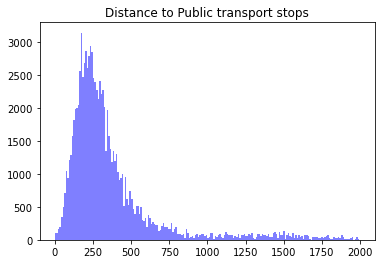

In [35]:
x = gdf[gdf['D_C_PTS'] < 2000].D_C_PTS
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distance to Public transport stops')
plt.show()

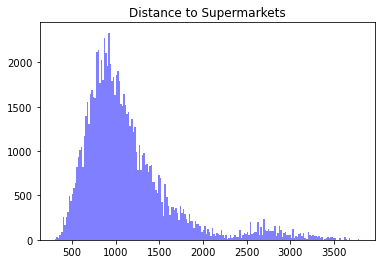

In [32]:
x = gdf[gdf['D_C_Super'] < 5000].D_C_Super
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distance to Supermarkets')
plt.show()

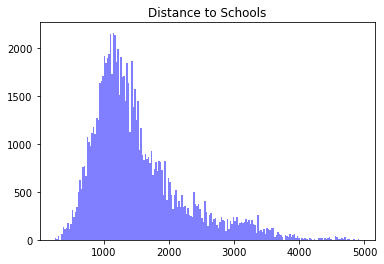

In [36]:
x = gdf[gdf['D_C_School'] < 5000].D_C_School
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distance to Schools')
plt.show()

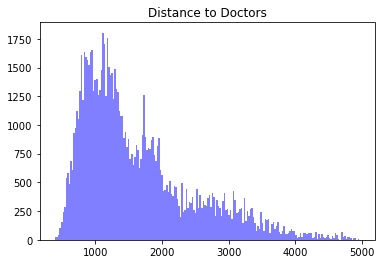

In [38]:
x = gdf[gdf['D_C_Doctor'] < 5000].D_C_Doctor
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distance to Doctors')
plt.show()

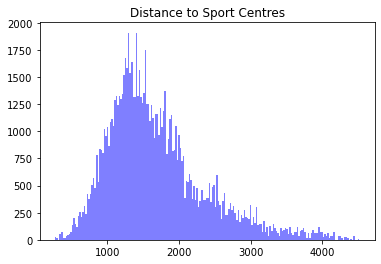

In [34]:
x = gdf[gdf['D_C_Sport'] < 5000].D_C_Sport
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distance to Sport Centres')
plt.show()

In [ ]:
x = gdf[gdf['D_C_School'] < 5000].D_C_School
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distance to Schools')
plt.show()

In [9]:
gdf.to_file('FINALDATASET3.shp')